# 中央競馬

In [6]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [7]:
%autoreload

In [8]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_20_to_21.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})

In [15]:
pd.options.display.max_columns = 300

In [17]:
df

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,race_class,place,season,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,weather_mode_past_2,race_type_mode,race_type_mode_past_5,race_type_mode_past_2,ground_state_mode,ground_state_mode_past_5,ground_state_mode_past_2,race_class_mode,race_class_mode_past_5,race_class_mode_past_2,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_last_year,jockey_dirt

In [18]:
df = df[df['race_type'] != 2]

In [ ]:
df.drop(['weather', 'ground_state'], errors='ignore', axis=1, inplace=True)

KeyError: "['weather', 'ground_state'] not found in axis"

In [ ]:
df.dropna()

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,race_class,place,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,weather_mode_past_2,race_type_mode,race_type_mode_past_5,race_type_mode_past_2,ground_state_mode,ground_state_mode_past_5,ground_state_mode_past_2,race_class_mode,race_class_mode_past_5,race_class_mode_past_2,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_last_year,jockey_dirt_participation_last_year,jockey_dirt_win_last_year,jockey_win_proba_last_year,jockey_top_2_proba_last_year,jockey_top_3_proba_last_year,jockey_earned_prize_last_year,reference_year_last_year,reference_year_last_

In [20]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [22]:
df_t = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_22_to_23.csv'), 
                    index_col=0,  sep="\t", dtype={'jockey_id': str, 'trainer_id': str})
df_t

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,weather,ground_state,race_class,place,season,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,weather_mode_past_2,race_type_mode,race_type_mode_past_5,race_type_mode_past_2,ground_state_mode,ground_state_mode_past_5,ground_state_mode_past_2,race_class_mode,race_class_mode_past_5,race_class_mode_past_2,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_

In [23]:
df_t = df_t[df_t['race_type'] != 2]

In [24]:
df_t.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)

C:\Users\SV8\AppData\Local\Temp\ipykernel_7556\2692494328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)


## RFmodel

In [25]:
%autoreload

In [ ]:
rf = predict.RFModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, save=False
)
pred_df = rf.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

TypeError: RFModel.__init__() got an unexpected keyword argument 'stochastic_variation'

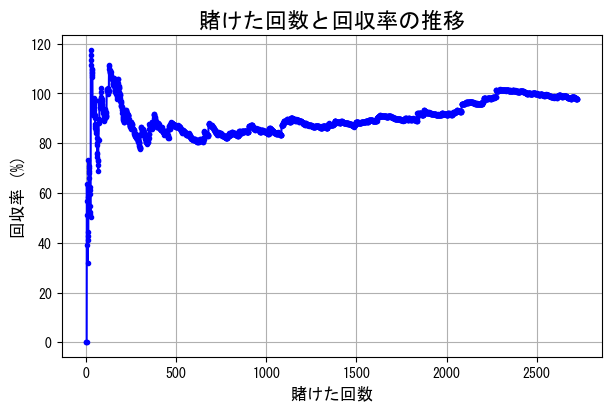

総払い戻し金額: 630820.0円
賭けた回数: 2724回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,300,400,0.0,0.000000,-400.0
2,202330041905,0.0,100,500,0.0,0.000000,-500.0
3,202330041907,510.0,300,800,510.0,0.637500,-290.0
4,202330042001,0.0,100,900,510.0,0.566667,-390.0
...,...,...,...,...,...,...,...
2719,202350123012,0.0,100,644700,630820.0,0.978471,-13880.0
2720,202350123107,0.0,600,645300,630820.0,0.977561,-14480.0
2721,202350123108,0.0,1000,646300,630820.0,0.976048,-15480.0
2722,202350123110,0.0,100,646400,630820.0,0.975897,-15580.0


In [ ]:
rf.plot_returns_rate(df_t)

In [28]:
rf_returns = rf.calc_results(df_t)
rf_returns

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,300,400,0.0,0.000000,-400.0
2,202330041905,0.0,100,500,0.0,0.000000,-500.0
3,202330041907,510.0,300,800,510.0,0.637500,-290.0
4,202330042001,0.0,100,900,510.0,0.566667,-390.0
...,...,...,...,...,...,...,...
2719,202350123012,0.0,100,644700,630820.0,0.978471,-13880.0
2720,202350123107,0.0,600,645300,630820.0,0.977561,-14480.0
2721,202350123108,0.0,1000,646300,630820.0,0.976048,-15480.0
2722,202350123110,0.0,100,646400,630820.0,0.975897,-15580.0


In [18]:
rf_returns[rf_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
10,202330051109,1210.0,200,5400,1210.0,0.224074,-4190.0
12,202330051708,3230.0,600,6600,4440.0,0.672727,-2160.0
14,202330053010,2140.0,200,7400,6580.0,0.889189,-820.0
167,202330110807,12150.0,600,94400,18730.0,0.198411,-75670.0
279,202342032412,590.0,200,156800,19320.0,0.123214,-137480.0
285,202342052905,1820.0,200,159600,21140.0,0.132456,-138460.0
336,202343011804,9140.0,600,189400,30280.0,0.159873,-159120.0
476,202347072005,1960.0,600,269400,32240.0,0.119673,-237160.0
565,202348032908,1410.0,200,318800,33650.0,0.105552,-285150.0
612,202348071207,20720.0,600,345000,54370.0,0.157594,-290630.0


In [19]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010606)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target


## NNmodel

In [34]:
%autoreload

In [35]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='umaren', threshold=0.6, stochastic_variation=False)
pred_df = nn.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[4967 1276]
 [ 982  932]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      6243
           1       0.42      0.49      0.45      1914

    accuracy                           0.72      8157
   macro avg       0.63      0.64      0.63      8157
weighted avg       0.74      0.72      0.73      8157

Accuracy: 0.7231825426014467
predicted_target
0    30238
1    10960
Name: count, dtype: int64
            race_id  horse_id  jockey_id  trainer_id  rank  frame  number  \
0      202330041901      4505        193         321   4.0      1       1   
1      202330041901      4517        186         289   3.0      2       2   
3      202330041901      4294        129         267   8.0      4       4   
4      202330041901       371         89         223   5.0      5       5   
6      202330041901      2851        147         261   7.0      7       7   
...             ...       ...        ...       

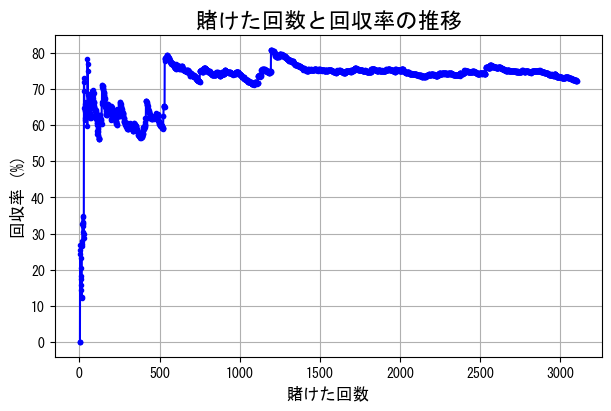

総払い戻し金額: 743160.0円
賭けた回数: 3103回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041903,0.0,300,300,0.0,0.000000,-300.0
1,202330041904,0.0,300,600,0.0,0.000000,-600.0
2,202330041905,0.0,300,900,0.0,0.000000,-900.0
3,202330041907,510.0,1000,1900,510.0,0.268421,-1390.0
4,202330041911,0.0,100,2000,510.0,0.255000,-1490.0
...,...,...,...,...,...,...,...
3098,202350123107,2690.0,1000,1025500,743160.0,0.724681,-282340.0
3099,202350123108,0.0,1000,1026500,743160.0,0.723975,-283340.0
3100,202350123109,0.0,1000,1027500,743160.0,0.723270,-284340.0
3101,202350123110,0.0,600,1028100,743160.0,0.722848,-284940.0


In [36]:
nn.plot_returns_rate(df_t)

## LGBmodel

In [45]:
%autoreload

In [46]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='umaren', threshold=0.6, stochastic_variation=False)
pred_df = lgb.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 7682, number of negative: 7682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15316
[LightGBM] [Info] Number of data points in the train set: 15364, number of used features: 177
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 7682, number of negative: 7682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5240
[LightGBM] [Info] Number of data points in the train set: 15364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[5094 1149]
 [ 883 1031]]
Classification Report:
               precision    recall  f1-score   support


       rank_mean_in_mode_course_len_past_5  \
0                                 5.440000   
1                                 8.294118   
3                                 2.000000   
4                                 7.684211   
6                                 8.857143   
...                                    ...   
70192                             5.583333   
70195                             7.500000   
70196                             3.580645   
70197                             4.285714   
70198                             5.225806   

       rank_diff_mean_in_mode_course_len_past_5  \
0                                      1.500000   
1                                      2.829412   
3                                      0.150000   
4                                      2.319737   
6                                      2.342857   
...                                         ...   
70192                                  1.162500   
70195                                  

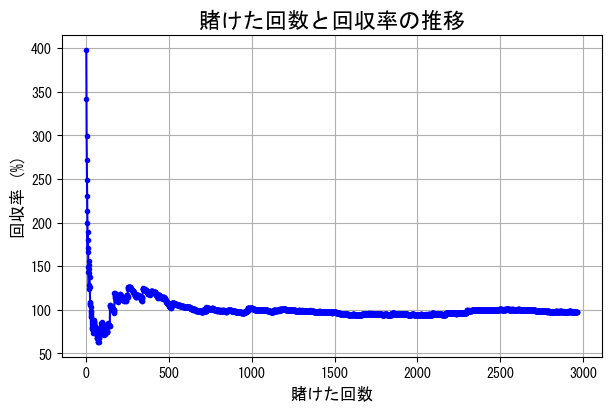

総払い戻し金額: 763980.0円
賭けた回数: 2964回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041905,2390.0,600,600,2390.0,3.983333,1790.0
1,202330041907,0.0,100,700,2390.0,3.414286,1690.0
2,202330042001,600.0,300,1000,2990.0,2.990000,1990.0
3,202330042002,0.0,100,1100,2990.0,2.718182,1890.0
4,202330042007,0.0,100,1200,2990.0,2.491667,1790.0
...,...,...,...,...,...,...,...
2959,202350123012,0.0,100,782000,761290.0,0.973517,-20710.0
2960,202350123103,0.0,100,782100,761290.0,0.973392,-20810.0
2961,202350123107,2690.0,300,782400,763980.0,0.976457,-18420.0
2962,202350123108,0.0,600,783000,763980.0,0.975709,-19020.0


In [47]:
lgb.plot_returns_rate(df_t)

## XGBmodel

In [48]:
%autoreload

In [49]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='umaren', threshold=0.6, stochastic_variation=False)
pred_df = xgb.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[5008 1235]
 [ 900 1014]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      6243
           1       0.45      0.53      0.49      1914

    accuracy                           0.74      8157
   macro avg       0.65      0.67      0.66      8157
weighted avg       0.75      0.74      0.75      8157

Accuracy: 0.738261615790119
Selected Feature Importance:
                                            feature  importance
70             rank_mean_in_mode_course_len_past_5    0.039180
73        rank_diff_mean_in_mode_course_len_past_5    0.038382
100                jockey_stakes_participation_sum    0.018938
108                  jockey_flat_participation_sum    0.018309
15                                        rank_min    0.017024
76            prize_mean_in_mode_course_len_past_5    0.016031
93                             jockey_n_top_2_mean    0.015701
71              rank_min_in_mode_course_l

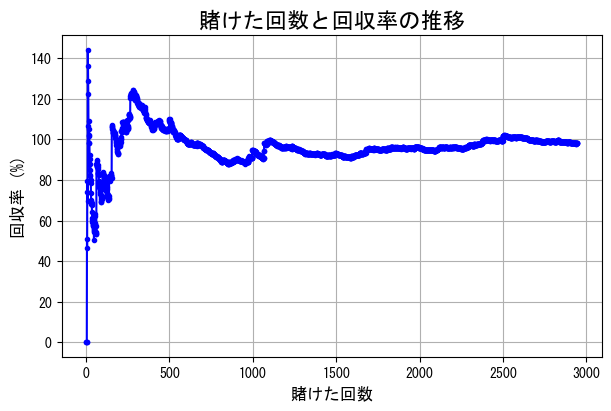

総払い戻し金額: 704780.0円
賭けた回数: 2945回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041901,0.0,100,100,0.0,0.000000,-100.0
1,202330041903,0.0,100,200,0.0,0.000000,-200.0
2,202330041904,0.0,600,800,0.0,0.000000,-800.0
3,202330041905,0.0,100,900,0.0,0.000000,-900.0
4,202330041907,510.0,100,1000,510.0,0.510000,-490.0
...,...,...,...,...,...,...,...
2940,202350123107,2690.0,1000,718000,704780.0,0.981588,-13220.0
2941,202350123108,0.0,100,718100,704780.0,0.981451,-13320.0
2942,202350123109,0.0,300,718400,704780.0,0.981041,-13620.0
2943,202350123110,0.0,600,719000,704780.0,0.980223,-14220.0


In [50]:
xgb.plot_returns_rate(df_t)

## Ensamblemodel

In [81]:
%autoreload

In [26]:
en = predict.EnsembleModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.60, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, final_model='lgb',save=False,
)
pred_df = en.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[5867 1323]
 [ 889 1167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      7190
           1       0.47      0.57      0.51      2056

    accuracy                           0.76      9246
   macro avg       0.67      0.69      0.68      9246
weighted avg       0.78      0.76      0.77      9246

Accuracy: 0.7607614103396063
Selected Feature Importance:
                                      feature  importance
0        rank_mean_in_mode_course_len_past_2    0.061744
1       prize_mean_in_mode_course_len_past_2    0.060195
4        rank_mean_in_mode_course_len_past_5    0.041748
19                                  horse_id    0.040133
6   rank_diff_mean_in_mode_course_len_past_2    0.039200
29                                  parent_5    0.039080
3        prize_sum_in_mode_course_len_past_2    0.038631
27                                  parent_1    0.037552
24            

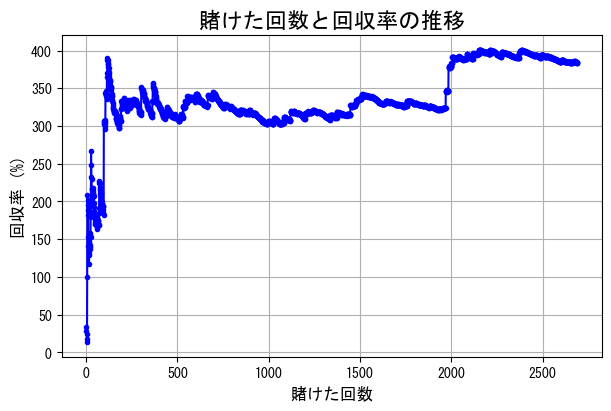

総払い戻し金額: 3063610.0円
賭けた回数: 2688回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,600,600,200.0,0.333333,-400.0
1,202201010103,0.0,100,700,200.0,0.285714,-500.0
2,202201010104,0.0,100,800,200.0,0.250000,-600.0
3,202201010106,0.0,300,1100,200.0,0.181818,-900.0
4,202201010109,0.0,400,1500,200.0,0.133333,-1300.0
...,...,...,...,...,...,...,...
2683,202310030707,0.0,400,796900,3063610.0,3.844410,2266710.0
2684,202310030712,0.0,600,797500,3063610.0,3.841517,2266110.0
2685,202310030803,0.0,100,797600,3063610.0,3.841036,2266010.0
2686,202310030807,0.0,400,798000,3063610.0,3.839110,2265610.0


In [27]:
en.plot_returns_rate(df_t, per_race=False)

In [28]:
en_returns = en.calc_results(df_t, per_race=False)

In [29]:
pred_df[(pred_df['race_id'] == 202201010103) & (pred_df['rank'] <= 3)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
15,202201010103,2.0,0.216419,0
18,202201010103,3.0,0.118070,0
26,202201010103,1.0,0.909184,1


In [30]:
671  / 2768

0.24241329479768786

In [171]:
en_returns.head(20)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,600,600,200.0,0.333333,-400.0
1,202201010103,0.0,300,900,200.0,0.222222,-700.0
2,202201010104,0.0,100,1000,200.0,0.200000,-800.0
3,202201010106,0.0,300,1300,200.0,0.153846,-1100.0
4,202201010109,0.0,100,1400,200.0,0.142857,-1200.0
5,202201010110,0.0,100,1500,200.0,0.133333,-1300.0
6,202201010112,2680.0,300,1800,2880.0,1.600000,1080.0
7,202201010202,0.0,100,1900,2880.0,1.515789,980.0
8,202201010204,0.0,100,2000,2880.0,1.440000,880.0
9,202201010208,0.0,400,2400,2880.0,1.200000,480.0


In [ ]:
en_returns[en_returns['returns'] > 0].head(20)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,600,600,200.0,0.333333,-400.0
19,202201010403,9610.0,400,6800,9810.0,1.442647,3010.0
23,202201010508,1500.0,600,8200,11310.0,1.379268,3110.0
24,202201010509,1060.0,100,8300,12370.0,1.490361,4070.0
26,202201010606,2460.0,400,9300,14830.0,1.594624,5530.0
29,202201020101,1460.0,300,10300,16290.0,1.581553,5990.0
32,202201020109,830.0,300,11300,17120.0,1.515044,5820.0
37,202201020204,1680.0,600,13200,18800.0,1.424242,5600.0
41,202201020210,12120.0,600,14600,30920.0,2.117808,16320.0
49,202201020412,2810.0,600,17300,33730.0,1.949711,16430.0


In [147]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010101)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
3,202201010101,5.0,0.698386,1
4,202201010101,3.0,0.818284,1


In [145]:
pred_df[pred_df['predicted_proba'] >= 0.85][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
21,202201010103,7.0,0.941704,1
26,202201010103,1.0,0.904281,1
40,202201010104,10.0,0.904884,1
...,...,...,...,...
47113,202310030802,2.0,0.955980,1
47116,202310030802,1.0,0.912627,1
47119,202310030802,3.0,0.876364,1
47147,202310030804,2.0,0.863812,1


In [244]:
pred_df[(pred_df['predicted_proba'] >= 0.85) & (pred_df['rank'] == 1)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
66,202201010106,1.0,0.949900,1
601,202201010503,1.0,0.940648,1
654,202201010507,1.0,0.873339,1
892,202201020101,1.0,0.891271,1
1121,202201020207,1.0,0.859515,1
...,...,...,...,...
46534,202310030408,1.0,0.881263,1
46693,202310030507,1.0,0.899776,1
46789,202310030602,1.0,0.922170,1
46992,202310030704,1.0,0.909107,1


In [242]:
887/2420

0.3665289256198347

# 地方競馬

## Ensenblemodel

In [103]:
%autoreload

In [104]:
df_cs = pd.read_csv(os.path.join(local_paths.FEATURES_CS_DIR, 'features_2022.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})
df_cs_t = pd.read_csv(os.path.join(local_paths.FEATURES_CS_DIR, 'features_2023.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})

In [105]:
returns_cs = pd.read_csv(os.path.join(local_paths.COMPLETED_CS_DIR, 'returns.csv'), index_col=0 ,sep="\t")

In [106]:
df_cs.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)
df_cs_t.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)

In [107]:
en = predict.EnsembleModel(
  train_df=df_cs, returns_df=returns_cs, bet_type='umaren', threshold=0.6, 
  max_bet=600, pivot_horse=True, select_features=True, 
  select_num=50, final_model='xgb', cs=True, save=False
)
pred_df = en.predict_target(df_cs_t)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[2874  723]
 [ 514  551]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      3597
           1       0.43      0.52      0.47      1065

    accuracy                           0.73      4662
   macro avg       0.64      0.66      0.65      4662
weighted avg       0.75      0.73      0.74      4662

Accuracy: 0.7346632346632347
Selected Feature Importance:
                                       feature  importance
1    rank_diff_mean_in_mode_course_len_past_2    0.042874
0         rank_mean_in_mode_course_len_past_2    0.041753
2        prize_mean_in_mode_course_len_past_2    0.033313
5         rank_mean_in_mode_course_len_past_5    0.032078
4    rank_diff_mean_in_mode_course_len_past_5    0.024655
6        prize_mean_in_mode_course_len_past_5    0.023672
10                              n_horses_mean    0.023310
16                                  prize_sum    0.021462
24   

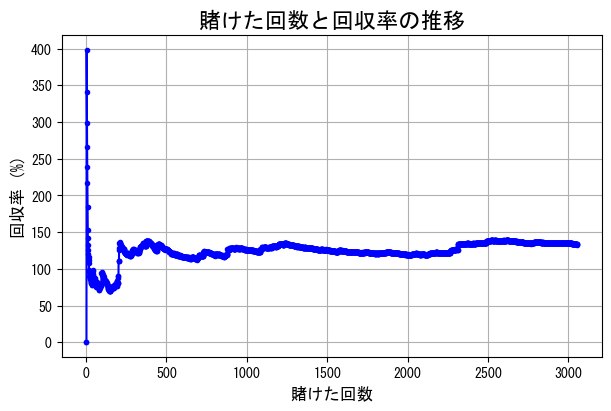

総払い戻し金額: 818250.0円
賭けた回数: 3055回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,200,300,0.0,0.000000,-300.0
2,202330041905,2390.0,300,600,2390.0,3.983333,1790.0
3,202330041907,0.0,100,700,2390.0,3.414286,1690.0
4,202330042007,0.0,100,800,2390.0,2.987500,1590.0
...,...,...,...,...,...,...,...
3050,202350123107,0.0,200,613700,818250.0,1.333306,204550.0
3051,202350123108,0.0,300,614000,818250.0,1.332655,204250.0
3052,202350123109,0.0,300,614300,818250.0,1.332004,203950.0
3053,202350123110,0.0,100,614400,818250.0,1.331787,203850.0


In [108]:
en.plot_returns_rate(df_cs_t, per_race=False)

In [92]:
# xgb: bet_type = umaren, select_num = 50, max_bet = 600, threshold = 0.6 | returns_rate = 1.45

In [93]:
len(df_t['race_id'].unique())

6660

In [94]:
en_returns = en.calc_results(df_cs_t, per_race=False)

In [95]:
en_returns['bet_sum'].value_counts()

bet_sum
100    1615
200     372
Name: count, dtype: int64

In [96]:
en_returns[en_returns['returns'] > 0].head(50)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
8,202330050310,360.0,100,900,360.0,0.400000,-540.0
16,202330051012,610.0,100,1900,970.0,0.510526,-930.0
23,202330052507,430.0,100,2600,1400.0,0.538462,-1200.0
26,202330053006,130.0,100,2900,1530.0,0.527586,-1370.0
27,202330053010,310.0,100,3000,1840.0,0.613333,-1160.0
32,202330060106,100.0,100,3600,1940.0,0.538889,-1660.0
35,202330060702,600.0,200,4000,2540.0,0.635000,-1460.0
38,202330060802,330.0,200,4400,2870.0,0.652273,-1530.0
46,202330061406,440.0,100,5400,3310.0,0.612963,-2090.0
49,202330061411,370.0,100,5800,3680.0,0.634483,-2120.0


# 出馬表からの予想結果

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

date = (datetime.now() + timedelta(days=1)).strftime('%Y%m%d')

pred_path = 'pred_df-candidates (4)/pred_candidates'


In [5]:
# ファイルのパスを指定して読み込む
pred_candidates_full = pd.read_csv(f'{pred_path}_full_{date}.csv', sep="\t", encoding='utf-8', index_col=0)
pred_candidates = pd.read_csv(f'{pred_path}_{date}.csv', sep="\t", encoding='utf-8', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'pred_df-candidates (4)/pred_candidates_full_20241114.csv'

In [6]:
pred_candidates

NameError: name 'pred_candidates' is not defined

In [7]:
pred_candidates_full_cs = pd.read_csv(f'{pred_path}_full_{date}_cs.csv', sep="\t", encoding='utf-8', index_col=0)
pred_candidates_cs = pd.read_csv(f'{pred_path}_{date}_cs.csv', sep="\t", encoding='utf-8', index_col=0)

In [8]:
pred_candidates_cs

,race_id,horse_id,number,place,predicted_proba,predicted_target,bet_sum,total_bet
0,202448111401,2020102354,4,名古屋,0.746448,1,300.0,300.0
1,202448111401,2021103390,7,名古屋,0.610913,1,300.0,300.0
2,202448111401,2021105446,9,名古屋,0.639472,1,300.0,300.0
4,202448111404,2021104801,1,名古屋,0.896582,1,100.0,400.0
5,202448111404,2021105455,4,名古屋,0.704707,1,100.0,400.0
6,202448111407,2021106973,2,名古屋,0.718440,1,300.0,700.0
7,202448111407,2021101427,8,名古屋,0.826412,1,300.0,700.0
8,202448111407,2021103395,9,名古屋,0.677985,1,300.0,700.0
9,202448111410,2021102247,1,名古屋,0.793984,1,200.0,900.0
10,202448111410,2021104410,4,名古屋,0.620003,1,200.0,900.0


In [9]:
df = pred_candidates.copy()

NameError: name 'pred_candidates' is not defined

In [10]:
df = pred_candidates_cs.copy()

In [11]:
# race_idごとにnumberの値をハイフンで結合し、combinationsカラムを作成
df['combinations'] = df.groupby('race_id')['number'].transform(lambda x: '-'.join(map(str, sorted(x.unique()))))

In [12]:
# race_idごとに条件を満たす最大のnumberをpivot_horseに設定
def get_pivot_horse(group):
    filtered = group[group['predicted_proba'] >= 0.85]
    if not filtered.empty:
        max_row = filtered.loc[filtered['predicted_proba'].idxmax()]
        return max_row['number']
    else:
        return 'None'

# race_idごとにpivot_horseを計算
pivot_horses = df.groupby('race_id').apply(get_pivot_horse)
df['pivot_horse'] = df['race_id'].map(pivot_horses)

# race_idごとにpivot_horseのpredicted_probaをpivot_probaとして取得
def get_pivot_proba(group):
    pivot_number = group['pivot_horse'].iloc[0]
    if pd.notna(pivot_number):
        # pivot_horseに対応するpredicted_probaを取得（行が存在するか確認）
        pivot_proba_row = group.loc[group['number'] == pivot_number, 'predicted_proba']
        if not pivot_proba_row.empty:
            return pivot_proba_row.iloc[0]
    return 'None'

# pivot_probaカラムをrace_idごとに追加
pivot_probas = df.groupby('race_id').apply(get_pivot_proba)
df['pivot_proba'] = df['race_id'].map(pivot_probas)

C:\Users\SV8\AppData\Local\Temp\ipykernel_11160\958460618.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_horses = df.groupby('race_id').apply(get_pivot_horse)
C:\Users\SV8\AppData\Local\Temp\ipykernel_11160\958460618.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_probas = df.groupby('race_id').apply(get_pivot_proba)


In [13]:
df.drop(['horse_id', 'number', 'predicted_proba', 'predicted_target'], axis=1).drop_duplicates()

,race_id,place,bet_sum,total_bet,combinations,pivot_horse,pivot_proba
0,202448111401,名古屋,300.0,300.0,4-7-9,None,None
4,202448111404,名古屋,100.0,400.0,1-4,1,0.896582
6,202448111407,名古屋,300.0,700.0,2-8-9,None,None
9,202448111410,名古屋,200.0,900.0,1-4-6,6,0.879823
13,202448111412,名古屋,300.0,1200.0,2-4-5,None,None
16,202450111403,園田,100.0,1300.0,1-5,None,None
20,202450111408,園田,300.0,1600.0,2-3-6,None,None
24,202450111410,園田,300.0,1900.0,4-7-9,None,None
32,202450111412,園田,300.0,2200.0,2-7-9,None,None


In [ ]:
# トータル収支 (11/9更新モデル) : cs 11/12
# -5400 + 2420 + 450 + 400 + 410 + 530 + 490 + 550 : -150
# -3400 - 150 + 120 + 2210 + 310 + 230 : -680
-2200 - 680 